# Task 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('creditcard_for_fraud_detection.csv')

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Initialize the model
model = IsolationForest(contamination=0.002, random_state=42)

model.fit(X_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

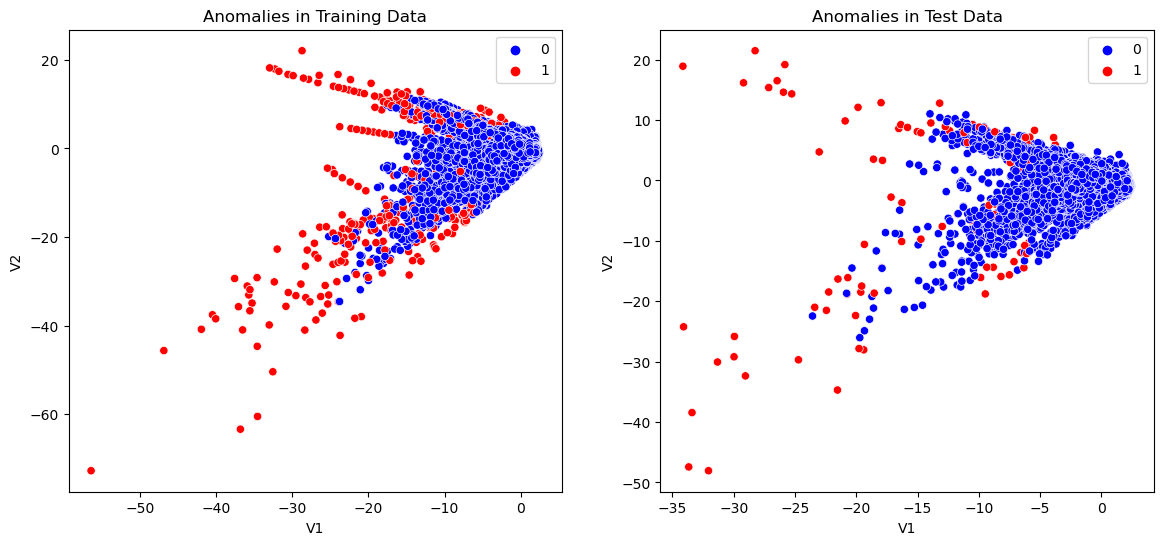

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_train['V1'], y=X_train['V2'], hue=y_pred_train, ax=ax[0], palette=['blue', 'red'])
ax[0].set_title('Anomalies in Training Data')

sns.scatterplot(x=X_test['V1'], y=X_test['V2'], hue=y_pred_test, ax=ax[1], palette=['blue', 'red'])
ax[1].set_title('Anomalies in Test Data')

plt.show()


# Task 2

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
customer_data = pd.read_csv('Credit Card Customer Data.csv')
customer_data=customer_data[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

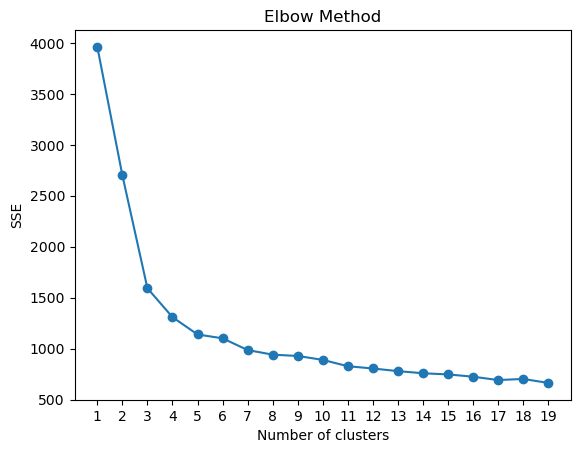

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i).fit(customer_data_scaled)
    data_inertia.append(kmeans.inertia_)

plt.plot(range(1, 20), data_inertia, marker='o')
plt.xlabel('Number of clusters')
plt.xticks(list(range(1,20)))
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

C:\Users\Aditya Gupta\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


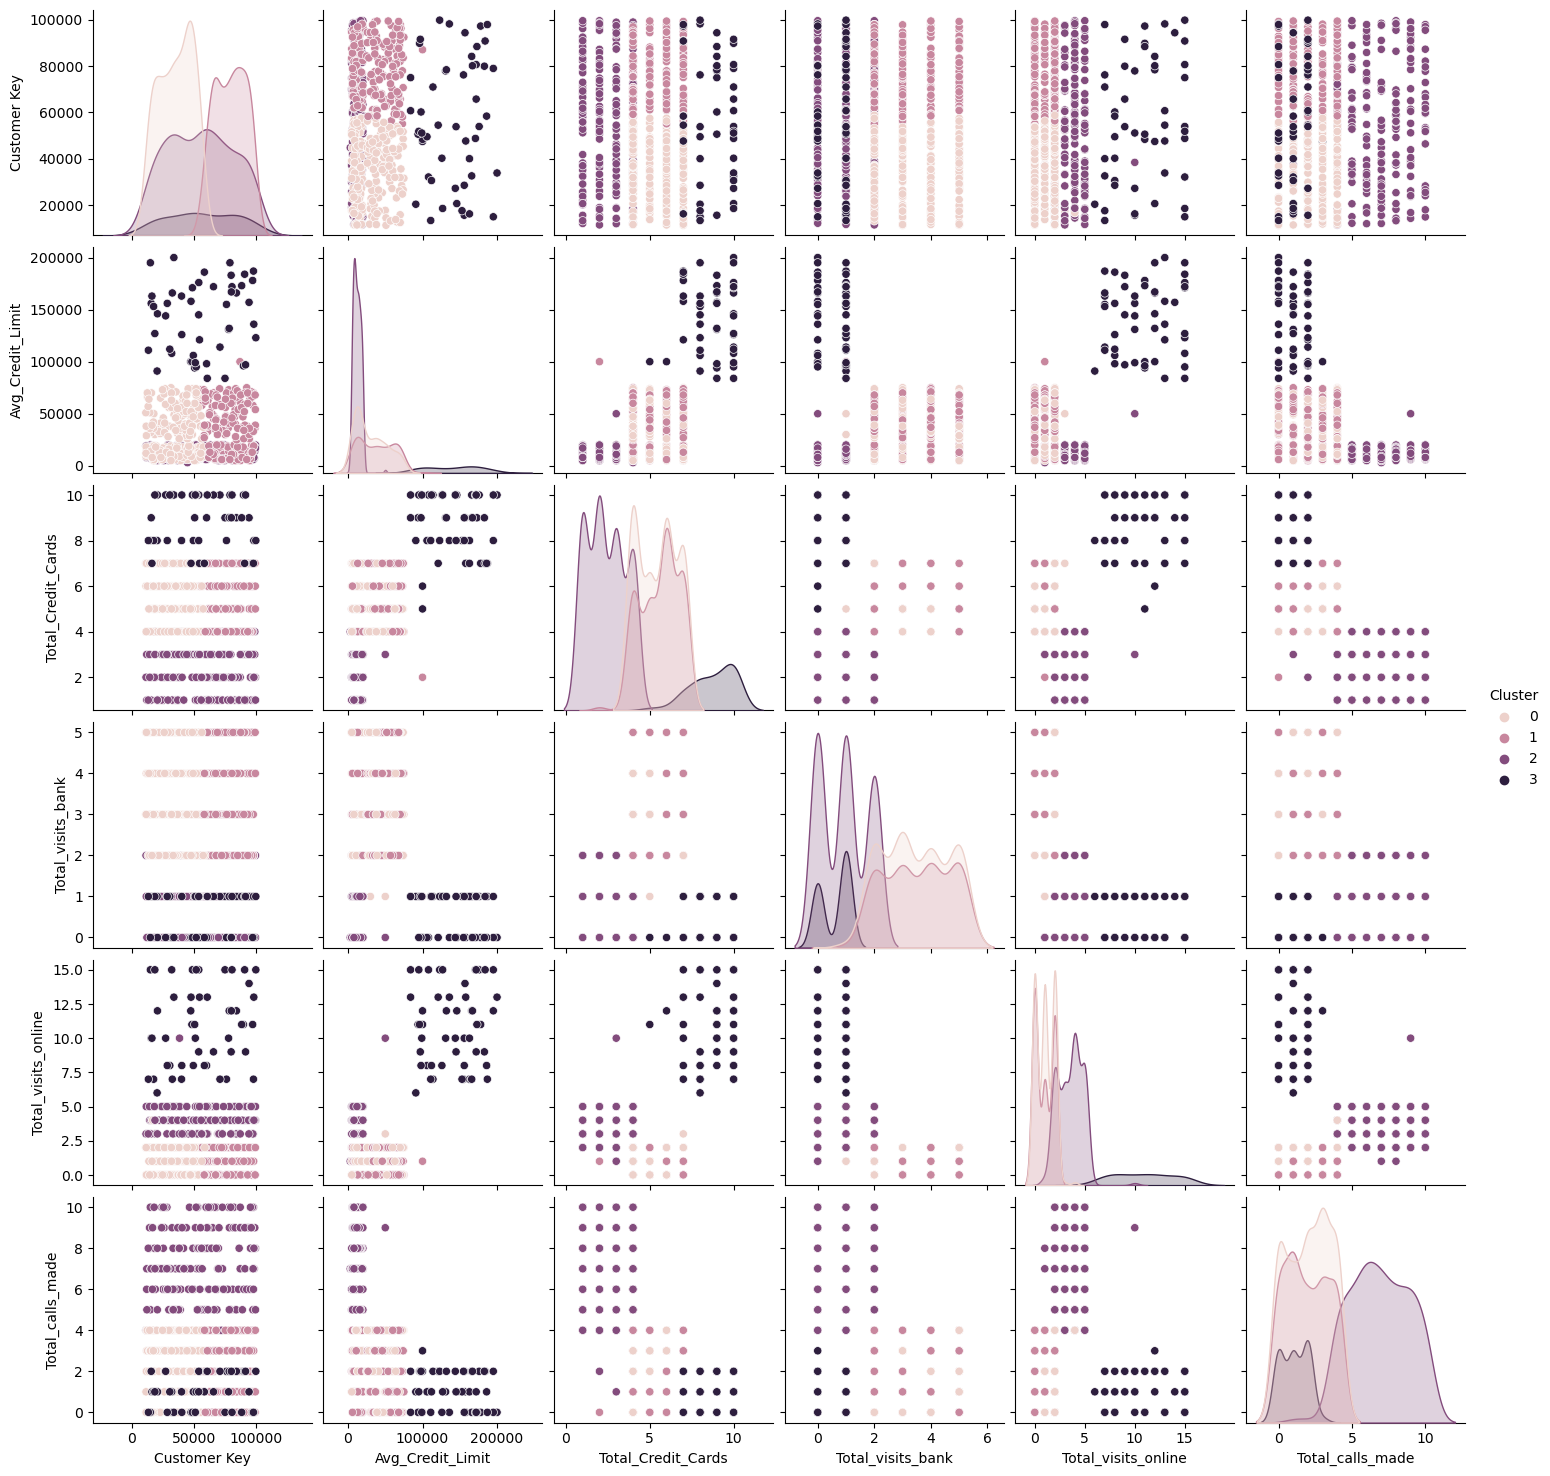

In [5]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

import seaborn as sns

sns.pairplot(customer_data, hue='Cluster')
plt.show()

In [6]:
features = customer_data.drop(columns=['Avg_Credit_Limit', 'Cluster'])
target = customer_data['Avg_Credit_Limit']
scaler = StandardScaler()
features=scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

Train RMSE: 23280.89
Test RMSE: 23095.35


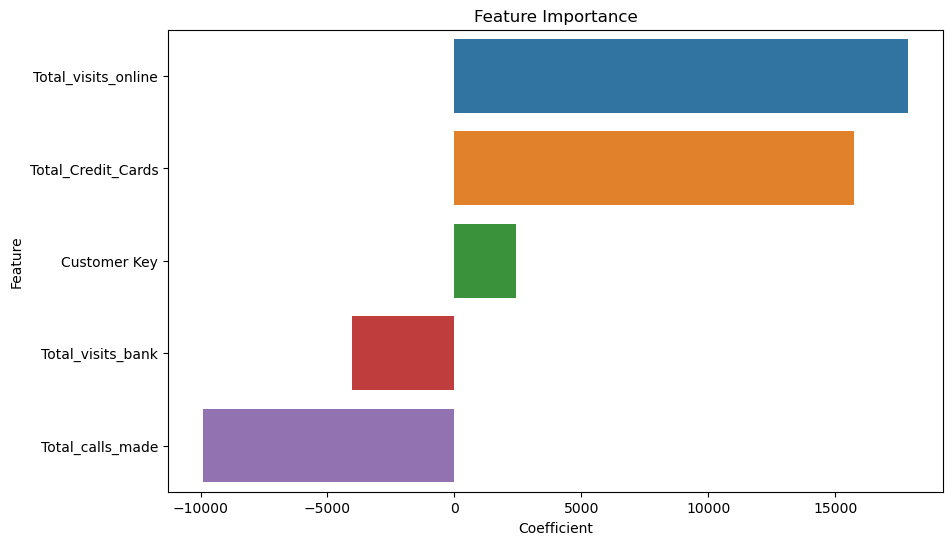

In [11]:
coefficients = pd.DataFrame({'Feature': ['Customer Key', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'], 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()